### Real Estate Valuation Data Set
Link to download the data set: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

#### Description of the data set:  
"The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan.  The real estate valuation is a regression problem.  The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples). "

#### Attribute Information 
<ul>
The inputs (features):
<li>X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) </li>
<li>X2=the house age (unit: year) </li>
<li>X3=the distance to the nearest MRT station (unit: meter) </li>
<li>X4=the number of convenience stores in the living circle on foot (integer) </li>
<li>X5=the geographic coordinate, latitude. (unit: degree) </li>
<li>X6=the geographic coordinate, longitude. (unit: degree) </li>
<br>
The output (target): 
<li>Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) </li>

#### Import Libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [141]:
df = pd.read_excel("Real estate valuation data set.xlsx")

In [142]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


#### EDA

In [143]:
df.shape

(414, 8)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


#### Clean Data: Remove "No" column 

In [145]:
# delete "No" column, axis = 1 is for column, inplace = True so you don't have to reassign df
df.drop(['No'], axis = 1, inplace = True)

In [146]:
# check to see if "No" column removed
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [147]:
# confirm again by checking shape
df.shape

(414, 7)

In [148]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### Make the heading names cleaner by renaming

In [149]:
cols = ["Transaction_Date", "House_Age", "Distance_To_Nearest_MRT_Station", "Number_Of_Convenience_Stores", "Latitude", "Longitude", "House_Price_Of_Unit_Area"]
df.columns = cols
df.head()

,Transaction_Date,House_Age,Distance_To_Nearest_MRT_Station,Number_Of_Convenience_Stores,Latitude,Longitude,House_Price_Of_Unit_Area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


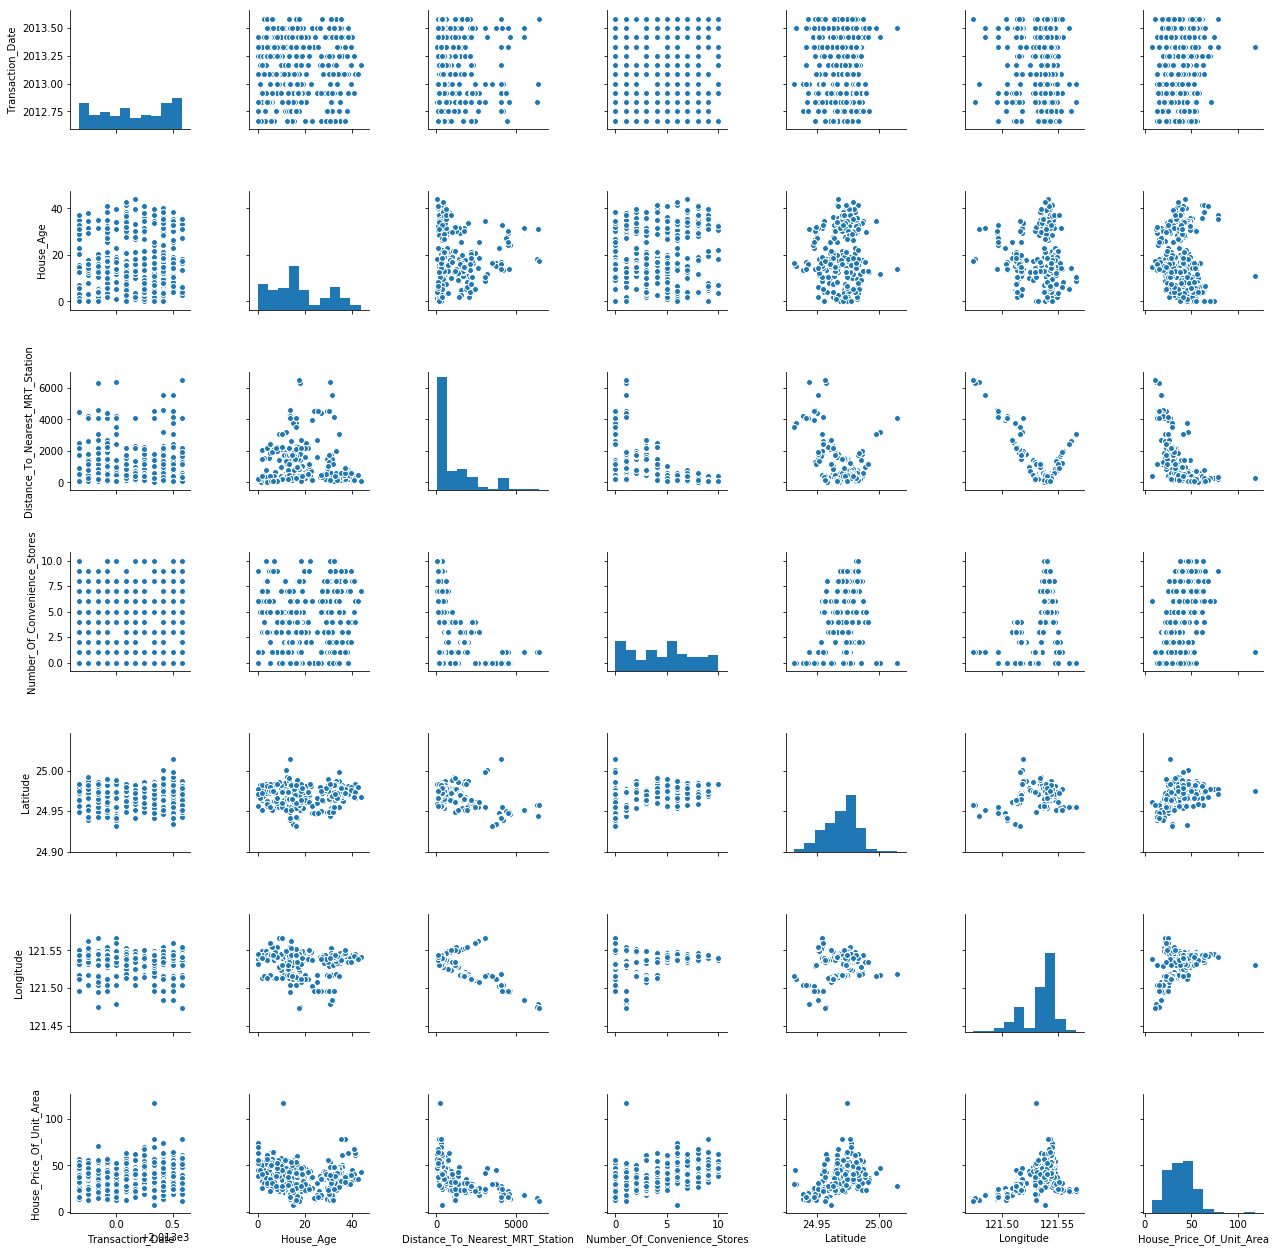

In [130]:
sns.pairplot(df)

#### Data Preprocessing 

In [150]:
seed = 42
np.random.seed(seed)

In [151]:
# input features
input_features = df.iloc[:, :6]
input_features.head()

,Transaction_Date,House_Age,Distance_To_Nearest_MRT_Station,Number_Of_Convenience_Stores,Latitude,Longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245


In [152]:
# target 
target = df["House_Price_Of_Unit_Area"]
target.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House_Price_Of_Unit_Area, dtype: float64

In [153]:
print(input_features.shape)
print(target.shape)

(414, 6)
(414,)


In [154]:
x_train, x_test, y_train, y_test = train_test_split(input_features, target,
                                                   train_size = 0.67,
                                                   test_size = 0.33,
                                                   random_state = seed)

scale = StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

### Linear Regression

In [155]:
mod1 = LinearRegression()
mod1.fit(x_train, y_train)
y_pred = mod1.predict(x_test)
mod1.score(x_test, y_test)

0.5543447737622118

Text(0.5,1,'House Price of Unit Area vs Predicted House Price of Unit Area')

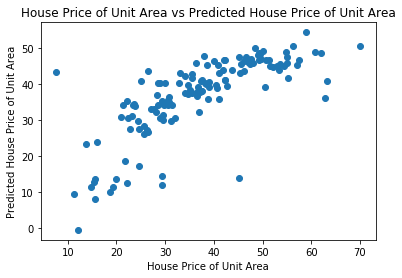

In [156]:
plt.scatter(y_test, y_pred)
plt.xlabel("House Price of Unit Area")
plt.ylabel("Predicted House Price of Unit Area")
plt.title("House Price of Unit Area vs Predicted House Price of Unit Area")

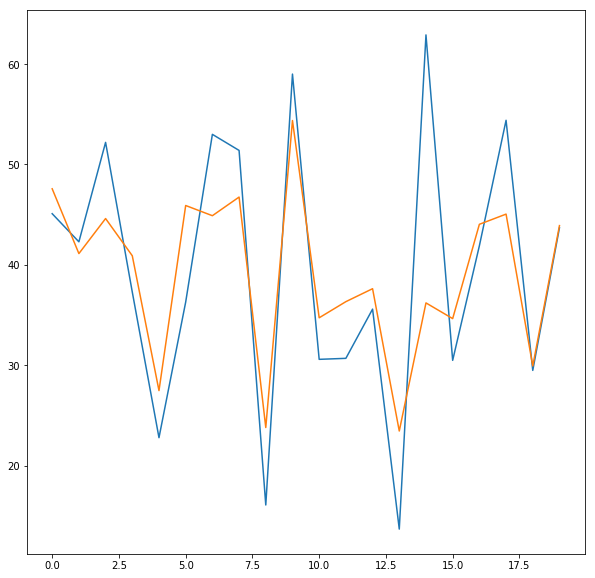

In [160]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(y_test.values[:20])
ax.plot(y_pred[:20])